In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
heart_disease = pd.read_excel('Processed_Cleveland.xlsx')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [3]:
# Define the features and the outcome
X = heart_disease.iloc[:, :13]
y = heart_disease.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

In [7]:
clusters = gmm_cluster.fit_predict(X_std)

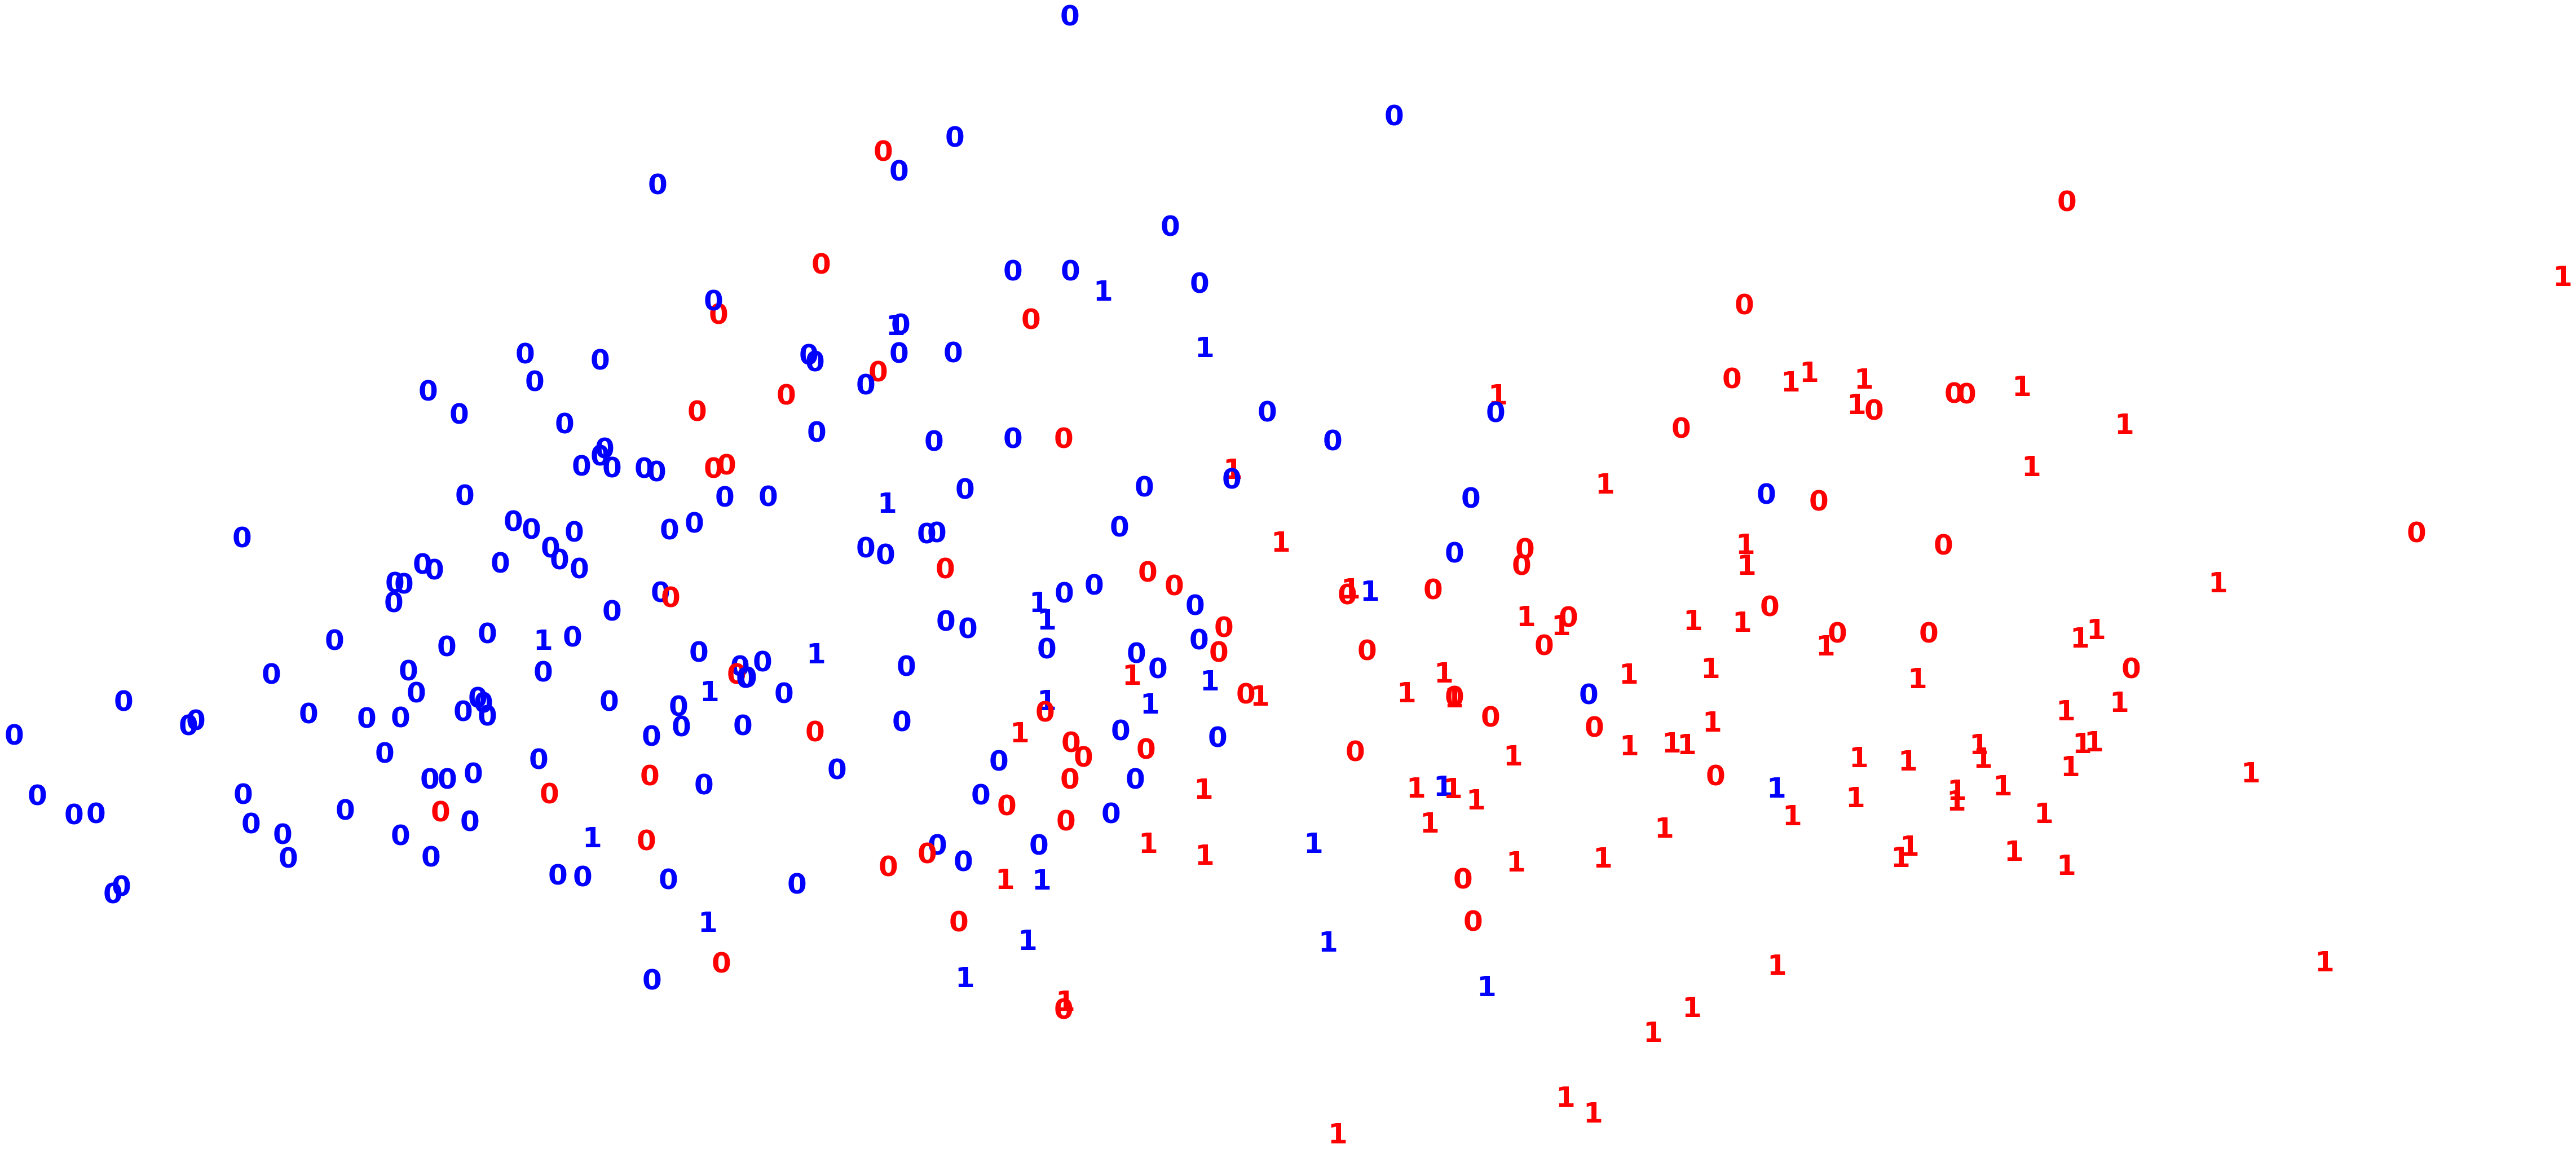

In [15]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [16]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.184
GMM çözümünün siluet skoru                  : 0.136


Recall that for 2 clusters in the K-means algo we had;


*    ARI score:
  0.7453081340344547
*   Silhouette Score:
  0.1757847117726187


And for average linkage in Hierarchical clustering;


*   Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi:
  0.29404901333534655
*   The silhoutte score of the Agglomerative Clustering solution:
  0.23325509557943136


Hence we got our results.

# Different Covariances

In [18]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='tied')

In [19]:
clusters = gmm_cluster.fit_predict(X_std)

In [21]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.184
GMM çözümünün siluet skoru                  : 0.136


In [35]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='diag')

In [36]:
clusters = gmm_cluster.fit_predict(X_std)

In [37]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.184
GMM çözümünün siluet skoru                  : 0.136


In [32]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='spherical' )

In [33]:
clusters = gmm_cluster.fit_predict(X_std)

In [34]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.208
GMM çözümünün siluet skoru                  : 0.125


Spherical covariance has the greater ARI score.
The difference in silhouette scores are not that significant.